## Project 1: Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
from datetime import datetime as dt

In [2]:
pd.options.mode.chained_assignment = None

### 1. Import Data Sources

#### A. MTA turnstile data (Apr to Jun 2018 and 2019)

In [3]:
list1 = pd.date_range(start='4/06/2019',end='6/29/2019',periods=13)

In [4]:
list2 = [x.strftime('%y%m%d') for x in list1]

In [5]:
list3 = []
for i in list2:
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_" + i + ".txt"
    df = pd.read_csv(url)
    list3.append(df)

In [6]:
df_MTA = pd.concat(list3)

In [7]:
with open('df_MTA.pickle', 'wb') as to_write:
    pickle.dump(df_MTA, to_write)

In [8]:
del df_MTA

#### B. US Census Bureau Data (TractID, Income Data)

In [3]:
df1 = pd.read_csv('acs2017_census_tract_data.csv')

#### C. NYC Subway Station Geo Data (Latitude, Longitude)

In [4]:
nyc_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')

### 2. Exploratory Data Analysis and Visualization

#### A. MTA turnstile data (Apr to Jun 2018 and 2019)

In [5]:
with open('df_MTA.pickle', 'rb') as read_file:
    df_MTA = pickle.load(read_file)

In [6]:
df_MTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664248 entries, 0 to 205962
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
mask1 = ((df_MTA["C/A"] == "PTH22")
         & (df_MTA["UNIT"] == "R540")
         & (df_MTA["SCP"] == "00-04-04")
         & (df_MTA["STATION"] == "PATH NEW WTC"))

#### <font color='red'> *Notice how DATE skips from 5/7/2019 to 6/5/2019 below for the C/A, UNIT, SCP, STATION combo below*

In [8]:
df_MTA[mask1][218:222]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
125704,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,05:04:02,REGULAR,11906,241488
125705,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,09:16:02,REGULAR,11906,241635
126878,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,12:20:37,REGULAR,4,75
126879,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,16:32:37,REGULAR,4,84


In [9]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,00:00:00,REGULAR,6999064,2373568
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,04:00:00,REGULAR,6999084,2373576
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,08:00:00,REGULAR,6999107,2373622
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,12:00:00,REGULAR,6999214,2373710
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/30/2019,16:00:00,REGULAR,6999451,2373781


In [10]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [11]:
df_MTA.columns = [column.strip() for column in df_MTA.columns]

In [12]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [13]:
df_MTA.DATE.value_counts().sort_index()

03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
              ...  
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, Length: 91, dtype: int64

In [14]:
df_MTA.DATE.value_counts().sort_index().head(10)

03/30/2019    28919
03/31/2019    28944
04/01/2019    29152
04/02/2019    28975
04/03/2019    29104
04/04/2019    29168
04/05/2019    28702
04/06/2019    28863
04/07/2019    28892
04/08/2019    29018
Name: DATE, dtype: int64

In [15]:
df_MTA.DATE.value_counts().sort_index().tail(10)

06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
06/22/2019    29217
06/23/2019    29170
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, dtype: int64

In [16]:
df_MTA["DATE_TIME"] = pd.to_datetime(df_MTA.DATE + " " + df_MTA.TIME, format="%m/%d/%Y %H:%M:%S")

In [17]:
# check for duplicates, for each combination of "C/A", "UNIT", "SCP", "STATION", "DATE_TIME"
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
626289,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
2178082,R283,R221,00-00-00,167 ST,2019-04-16 04:00:00,2
384181,G009,R151,02-00-04,CONEY IS-STILLW,2019-05-16 17:00:00,2
1749648,R133,R272,00-00-00,28 ST,2019-04-09 13:00:00,2
626294,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
627445,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-17 09:00:00,2
527149,JFK03,R536,00-00-04,JFK JAMAICA CT1,2019-04-07 01:00:00,2
627947,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
701781,N071,R013,00-00-03,34 ST-PENN STA,2019-04-20 08:00:00,2
525303,JFK03,R536,00-00-01,JFK JAMAICA CT1,2019-04-07 01:00:00,2


In [18]:
mask = ((df_MTA["C/A"] == "N071") & 
(df_MTA["UNIT"] == "R013") & 
(df_MTA["SCP"] == "00-00-02") & 
(df_MTA["STATION"] == "34 ST-PENN STA") &
(df_MTA["DATE_TIME"].dt.date == datetime.datetime(2019, 4, 20).date()))

In [19]:
df_MTA[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
53584,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,00:00:00,RECOVR AUD,3071535,4512012,2019-04-20 00:00:00
53585,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,04:00:00,REGULAR,8481280,10918514,2019-04-20 04:00:00
53586,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,REGULAR,8481300,10918541,2019-04-20 08:00:00
53587,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,RECOVR AUD,3071562,4512111,2019-04-20 08:00:00
53588,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,12:00:00,REGULAR,3071678,4512313,2019-04-20 12:00:00
53589,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,16:00:00,REGULAR,3071862,4512589,2019-04-20 16:00:00
53590,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,20:00:00,REGULAR,3072147,4512819,2019-04-20 20:00:00


In [20]:
df_MTA.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)

In [21]:
df_MTA.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
df_MTA.DESC.value_counts()

REGULAR       2652913
RECOVR AUD      11279
Name: DESC, dtype: int64

In [23]:
# confirm that there are no duplicates, that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" combo are unique
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-03-30 00:00:00,1
1776141,R141,R031,00-06-00,34 ST-PENN STA,2019-03-31 12:00:00,1
1776123,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 12:00:00,1
1776124,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 16:00:00,1
1776125,R141,R031,00-03-04,34 ST-PENN STA,2019-06-27 20:00:00,1


In [24]:
df_MTA_2019 = df_MTA

In [25]:
df_MTA_2019['LINENAME'] = df_MTA_2019['LINENAME'].apply(lambda x: ''.join(sorted(x)))

In [26]:
df_MTA_2019['station_linename'] = df_MTA_2019['STATION'] + "_" + df_MTA_2019["LINENAME"]

In [27]:
list_of_station_linenames = sorted(df_MTA_2019['station_linename'].unique())

In [28]:
x = list(df_MTA_2019['STATION'].unique())

In [29]:
# confirm that there are no "_" in "STATION" column (so you can split using "_" below)
set(np.char.find(x, '_'))

{-1}

In [30]:
# create a dictionary called station_linenames_dict where keys are station names, values are unique line names 
# that run out of that station
# assumption is that if a "STATION" has unique linenames, it is a unique STATION (physical/geo/map)
# PURPOSE is to separate "STATION" into individual separate subway stations in real life NYC (e.g. 23rd St, 86th St, 125th St)
station_linenames_dict = {}

for station_linename in list_of_station_linenames:
    # split into station and linename
    station, linename = station_linename.split('_')
    
    if station in station_linenames_dict:
        
        unique_linename = True
        for current_values in station_linenames_dict[station]:
        # if linename shares any linenames with other station/linenames, set linename to the union of all shared linenames   
            if set(linename).intersection(set(current_values)):
                station_linenames_dict[station] = [''.join(sorted(set(linename).union(set(current_values))))]
                unique_linename = False
        
        # if unique linename, then assume it is a separate subway station in real life NYC 
        if unique_linename == True:
            station_linenames_dict[station].append(linename)
    
    else:
        station_linenames_dict[station] = [linename]

In [31]:
def proper_station_linename_column(row):  
    """
    Function below to account for multiple subway stations in real life NYC showing up as the same string in 
    'STATION' column (e.g. 23rd St, 86th St, 125th St)
    """
    if len(station_linenames_dict[row['STATION']]) > 1:
        row['STATION'] = row['station_linename']
    return row['STATION']

In [32]:
df_MTA_2019['STATION'] = df_MTA_2019.apply(proper_station_linename_column, axis=1)

In [33]:
# take the first row for each combination of "C/A", "UNIT", "SCP", "STATION", "DATE" to later calculate daily entries/exits
df_MTA_2019_daily = (df_MTA_2019
                     .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[["ENTRIES","EXITS"]]
                     .first())

In [34]:
df_MTA_2019_daily["PREV_DATE"] = (df_MTA_2019_daily
                                  .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                  .DATE
                                  .apply(lambda group: group.shift(1)))

In [35]:
df_MTA_2019_daily["PREV_ENTRIES"] = (df_MTA_2019_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                     .ENTRIES
                                     .apply(lambda group: group.shift(1)))

In [36]:
df_MTA_2019_daily["PREV_EXITS"] = (df_MTA_2019_daily
                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                   .EXITS
                                   .apply(lambda group: group.shift(1)))

In [37]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0


In [38]:
# check if entries is less than previous day's entries
# perhaps turnstiles are working in reverse order/count
df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
7044,A025,R023,01-03-01,34 ST-HERALD SQ,03/31/2019,1238567092,1813218523,03/30/2019,1.238570e+09,1.813217e+09
7045,A025,R023,01-03-01,34 ST-HERALD SQ,04/01/2019,1238565030,1813219495,03/31/2019,1.238567e+09,1.813219e+09
7046,A025,R023,01-03-01,34 ST-HERALD SQ,04/02/2019,1238561212,1813221361,04/01/2019,1.238565e+09,1.813219e+09
7047,A025,R023,01-03-01,34 ST-HERALD SQ,04/03/2019,1238557159,1813223205,04/02/2019,1.238561e+09,1.813221e+09
7048,A025,R023,01-03-01,34 ST-HERALD SQ,04/04/2019,1238553023,1813225047,04/03/2019,1.238557e+09,1.813223e+09


In [39]:
(df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]]
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    90
A037  R170  05-00-00  14 ST-UNION SQ      1
A038  R085  00-00-01  8 ST-NYU            1
            00-06-00  8 ST-NYU            1
A039  R085  01-00-01  8 ST-NYU            1
                                         ..
R623  R061  00-00-00  NOSTRAND AV_3       1
            00-00-01  NOSTRAND AV_3       1
R629  R065  00-00-00  ROCKAWAY AV_3       1
R646  R110  01-00-01  FLATBUSH AV-B.C    90
R730  R431  00-00-04  EASTCHSTER/DYRE    86
Length: 547, dtype: int64

In [40]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

In [41]:
# 60 seconds per minute, 60 min per hour, 24 hours per day; 1 person per second (starting assumption)
60*60*24

86400

In [42]:
df_MTA_2019_daily["DAILY_ENTRIES"] = df_MTA_2019_daily.apply(get_daily_counts, axis=1, max_counter = 86400)

In [43]:
# since group C/A, UNIT, SCP, STATION was sorted based on ascending order, taking the first row for each group
# provides timestamp at midnight 00:00:00 (or early hours) of that day, therefore DAILY_ENTRIES provides the 
# number of daily entries for the previous day, so it needs to be shifted up one row for each group
df_MTA_2019_daily["DAILY_ENTRIES_ADJ"] = (df_MTA_2019_daily
                                          .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                          .DAILY_ENTRIES
                                          .apply(lambda x: x.shift(-1)))

In [44]:
# drop the "DAILY_ENTRIES" column
df_MTA_2019_daily.drop(columns=["DAILY_ENTRIES"], inplace = True)

In [45]:
# rename the "DAILY_ENTRIES_ADJ" column as "DAILY_ENTRIES"
df_MTA_2019_daily.rename(columns={"DAILY_ENTRIES_ADJ":"DAILY_ENTRIES"}, inplace = True)

In [46]:
# create a mask for one of the rows above where the daily entries is very very large
mask3 = ((df_MTA_2019_daily["C/A"] == "PTH22") 
         & (df_MTA_2019_daily["UNIT"] == "R540") 
         & (df_MTA_2019_daily["SCP"] == "00-04-06")
         & (df_MTA_2019_daily["STATION"] == "PATH NEW WTC"))

In [47]:
df_MTA_2019_daily[mask3][-30:-20]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
273133,PTH22,R540,00-04-06,PATH NEW WTC,05/26/2019,83909,267068,05/25/2019,83899.0,266971.0,21.0
273134,PTH22,R540,00-04-06,PATH NEW WTC,05/27/2019,83930,267146,05/26/2019,83909.0,267068.0,10.0
273135,PTH22,R540,00-04-06,PATH NEW WTC,05/28/2019,83940,267210,05/27/2019,83930.0,267146.0,190.0
273136,PTH22,R540,00-04-06,PATH NEW WTC,05/29/2019,84130,267517,05/28/2019,83940.0,267210.0,221.0
273137,PTH22,R540,00-04-06,PATH NEW WTC,05/30/2019,84351,267822,05/29/2019,84130.0,267517.0,160.0
273138,PTH22,R540,00-04-06,PATH NEW WTC,05/31/2019,84511,268115,05/30/2019,84351.0,267822.0,84503.0
273139,PTH22,R540,00-04-06,PATH NEW WTC,06/05/2019,8,48,05/31/2019,84511.0,268115.0,156.0
273140,PTH22,R540,00-04-06,PATH NEW WTC,06/06/2019,164,121,06/05/2019,8.0,48.0,222.0
273141,PTH22,R540,00-04-06,PATH NEW WTC,06/07/2019,386,483,06/06/2019,164.0,121.0,114.0
273142,PTH22,R540,00-04-06,PATH NEW WTC,06/08/2019,500,774,06/07/2019,386.0,483.0,0.0


In [48]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max()

84503.0

In [49]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

148.0

In [50]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max() / df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

570.9662162162163

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


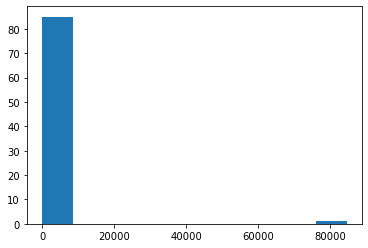

In [51]:
# plot daily entries based on the conditions in mask3, clearly there is an outlier!
plt.hist(df_MTA_2019_daily[mask3].DAILY_ENTRIES)
plt.savefig('hist_PTH22_R540_000406_PATHNEWWTC.outlier.png');

In [52]:
# create a new column "DATE_DIFF" to see the difference between "DATE" and "PREV_DATE"
df_MTA_2019_daily["DATE_DIFF"] = pd.to_datetime(df_MTA_2019_daily.DATE) - pd.to_datetime(df_MTA_2019_daily.PREV_DATE)

In [53]:
# look at all the rows where date_diff is greater than 1 day
df_MTA_2019_daily.sort_values(by="DATE_DIFF",ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF
246335,PTH02,R544,00-00-08,HARRISON,05/24/2019,142284,6516,04/13/2019,655363.0,82906.0,NaN,41 days
272966,PTH22,R540,00-04-04,PATH NEW WTC,06/05/2019,4,75,05/07/2019,11906.0,241487.0,6.0,29 days
268439,PTH20,R549,03-00-08,NEWARK HM HE,05/20/2019,36975,1148746,04/25/2019,409.0,2356.0,36546.0,25 days
199341,N414A,R316,01-00-01,FLUSHING AV_G,05/02/2019,547675,230120,04/08/2019,547673.0,230118.0,0.0,24 days
199409,N414A,R316,01-00-02,FLUSHING AV_G,05/02/2019,1469103,668846,04/08/2019,1469100.0,668841.0,0.0,24 days
199477,N414A,R316,01-06-00,FLUSHING AV_G,05/02/2019,1721039,1610756,04/08/2019,1721035.0,1610752.0,0.0,24 days
199545,N414A,R316,01-06-01,FLUSHING AV_G,05/02/2019,2275461,2828879,04/08/2019,2275458.0,2828875.0,0.0,24 days
199273,N414A,R316,01-00-00,FLUSHING AV_G,05/02/2019,665527,741121,04/08/2019,665524.0,741116.0,0.0,24 days
78171,J002,R460,00-06-00,MARCY AV,05/08/2019,196696,218,04/17/2019,1969149.0,4031712.0,210.0,21 days
292397,R137,R031,02-03-01,34 ST-PENN STA,06/28/2019,76679,71988,06/11/2019,76679.0,56951.0,NaN,17 days


In [54]:
time_range = pd.timedelta_range(start='1 day',periods=1)

In [55]:
len(df_MTA_2019_daily)

440638

In [56]:
# create a new dataframe to filter those specific rows where the difference between DATE and PREV_DATE > 1 day
df_MTA_2019_highdatediff = df_MTA_2019_daily[df_MTA_2019_daily.DATE_DIFF > time_range[0]]

In [57]:
len(df_MTA_2019_highdatediff)

580

In [58]:
# remove all rows where DATE_DIFF > 1 day
df_MTA_2019_daily.drop(df_MTA_2019_highdatediff.index, inplace=True)

In [59]:
len(df_MTA_2019_daily)

440058

In [60]:
# for a unique turnstile at a subway station, find the max and median daily_entries
df_MTA_2019_dailystats = (df_MTA_2019_daily
                           .groupby(["C/A","UNIT","SCP","STATION"])
                           .agg({"DAILY_ENTRIES": [np.max, np.median]}))

In [61]:
df_MTA_2019_dailystats = pd.DataFrame(df_MTA_2019_dailystats)

In [62]:
df_MTA_2019_dailystats.reset_index(inplace = True)

In [63]:
df_MTA_2019_dailystats.head()

C/A  UNIT       SCP STATION DAILY_ENTRIES        
                                         amax  median
0  A002  R051  02-00-00   59 ST        1703.0  1502.0
1  A002  R051  02-00-01   59 ST        1329.0  1225.5
2  A002  R051  02-03-00   59 ST         573.0   488.5
3  A002  R051  02-03-01   59 ST        1397.0  1279.0
4  A002  R051  02-03-02   59 ST        1560.0  1305.5

In [64]:
df_MTA_2019_dailystats.columns = ["C/A", "UNIT", "SCP", "STATION", "MAX_DAILY_ENTRIES_TURNSTILE", "MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [65]:
df_MTA_2019_dailystats.head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE
0,A002,R051,02-00-00,59 ST,1703.0,1502.0
1,A002,R051,02-00-01,59 ST,1329.0,1225.5
2,A002,R051,02-03-00,59 ST,573.0,488.5
3,A002,R051,02-03-01,59 ST,1397.0,1279.0
4,A002,R051,02-03-02,59 ST,1560.0,1305.5


In [66]:
df_MTA_2019_dailystats['peak_factor'] = (df_MTA_2019_dailystats["MAX_DAILY_ENTRIES_TURNSTILE"] / 
                                         df_MTA_2019_dailystats["MEDIAN_DAILY_ENTRIES_TURNSTILE"])

In [67]:
df_MTA_2019_dailystats.sort_values(by='peak_factor',ascending=False)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
4911,TRAM2,R469,00-05-00,RIT-ROOSEVELT,3.0,0.0,inf
2919,PTH13,R541,00-04-08,THIRTY ST,1.0,0.0,inf
2605,N601,R319,00-05-00,LEXINGTON AV/63,4.0,0.0,inf
177,A046,R463,00-05-02,CANAL ST_6JNQRWZ,4.0,0.0,inf
4335,R421,R427,00-06-00,MIDDLETOWN RD,2.0,0.0,inf
...,...,...,...,...,...,...,...
4809,R637,R451,00-06-00,WINTHROP ST,0.0,0.0,NaN
4815,R639,R109,00-05-01,CHURCH AV_25,0.0,0.0,NaN
4817,R639,R109,00-05-03,CHURCH AV_25,0.0,0.0,NaN
4839,R645,R110,00-05-01,FLATBUSH AV-B.C,0.0,0.0,NaN


In [68]:
df_MTA_2019_dailystats.replace(to_replace = np.inf, value = np.nan, inplace = True)

In [69]:
df_MTA_2019_dailystats.sort_values(by='peak_factor',ascending=False).head(10)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
2737,PTH01,R549,00-01-03,NEWARK HW BMEBE,83070.0,1.0,83070.000000
3058,PTH22,R540,00-04-02,PATH NEW WTC,22190.0,1.0,22190.000000
1066,N013,R035,02-05-00,168 ST,5064.0,1.0,5064.000000
3059,PTH22,R540,00-04-03,PATH NEW WTC,27148.0,6.0,4524.666667
1115,N026,R102,00-05-00,125 ST_ABCD,13389.0,3.5,3825.428571
4545,R532,R328,00-05-03,METS-WILLETS PT,1691.0,0.5,3382.000000
4544,R532,R328,00-05-02,METS-WILLETS PT,2337.0,1.0,2337.000000
1195,N051,R084,02-05-00,59 ST COLUMBUS,5921.0,3.0,1973.666667
2869,PTH07,R550,00-02-01,CITY / BUS,13830.0,8.0,1728.750000
3060,PTH22,R540,00-04-04,PATH NEW WTC,11902.0,7.0,1700.285714


In [70]:
df_MTA_2019_daily["unique_turnstile"] = (df_MTA_2019_daily["C/A"] + "_" +
                                         df_MTA_2019_daily["UNIT"] + "_" +
                                         df_MTA_2019_daily["SCP"] + "_" +
                                         df_MTA_2019_daily["STATION"])

In [71]:
df_MTA_2019_dailystats["unique_turnstile"] = (df_MTA_2019_dailystats["C/A"] + "_" +
                                              df_MTA_2019_dailystats["UNIT"] + "_" +
                                              df_MTA_2019_dailystats["SCP"] + "_" +
                                              df_MTA_2019_dailystats["STATION"])

In [72]:
df_MTA_2019_dailystats_sum = df_MTA_2019_dailystats[["unique_turnstile","MAX_DAILY_ENTRIES_TURNSTILE","MEDIAN_DAILY_ENTRIES_TURNSTILE","peak_factor"]]

In [73]:
df_MTA_2019_daily.shape

(440058, 13)

In [74]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_dailystats_sum,how='left',on='unique_turnstile')

In [75]:
df_MTA_2019_daily.shape

(440058, 16)

In [76]:
# create a mask to identify outliers, where peak factor (max divided by median) is greater than 10 
# AND daily entries is at least 90% of max daily entries by turnstile
# AND max daily entries turnstile is at least 10000
mask7 = ((df_MTA_2019_daily['peak_factor'] > 10) 
         & (df_MTA_2019_daily['DAILY_ENTRIES'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_ENTRIES_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_ENTRIES_TURNSTILE'] >= 10000))

In [77]:
df_MTA_2019_daily = df_MTA_2019_daily[~mask7]

In [78]:
len(df_MTA_2019_daily)

439887

In [79]:
# mask to identify high outliers, DAILY_ENTRIES > 5*median daily entries for that turnstile
mask_high_daily_entries = df_MTA_2019_daily["DAILY_ENTRIES"] > 5*df_MTA_2019_daily["MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [80]:
len(df_MTA_2019_daily[mask_high_daily_entries])

4913

In [81]:
# remove rows where daily entries is significantly greater than median daily entries
df_MTA_2019_daily = df_MTA_2019_daily[~mask_high_daily_entries]

In [82]:
len(df_MTA_2019_daily)

434974

In [83]:
def daily_exits(df, max_counter):
    """
    Function to calculate daily number of exits at turnstiles in NYC subway stations.
    Accounts for turnstiles in reverse order as well as large daily exits values.
    
    Args:
        df: pandas dataframe with columns "EXITS" and "PREV_EXITS"
        max_counter: integer
    
    Returns:
        counter
    """
    counter = df["EXITS"] - df["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(df["EXITS"], df["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter

In [84]:
df_MTA_2019_daily["DAILY_EXITS"] = df_MTA_2019_daily.apply(daily_exits, axis=1, max_counter=86400)

In [85]:
# similar to DAILY_ENTRIES_ADJ, need to shift up 1 b/c original group object was sorted in ascending order
# and timestamps were at midnight
df_MTA_2019_daily["DAILY_EXITS_ADJ"] = (df_MTA_2019_daily
                                        .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                        .DAILY_EXITS
                                        .apply(lambda x: x.shift(-1)))

In [86]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,DAILY_EXITS_ADJ
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN,893.0,NaT,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,NaN,299.0
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,299.0,228.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,228.0,484.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,484.0,554.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,554.0,424.0


In [87]:
df_MTA_2019_daily.drop(columns=["DAILY_EXITS"], inplace = True)

In [88]:
df_MTA_2019_daily.rename(columns = {"DAILY_EXITS_ADJ":"DAILY_EXITS"}, inplace = True)

In [89]:
df_MTA_2019_daily_exits = (df_MTA_2019_daily
                           .groupby(["C/A","UNIT","SCP","STATION"])
                           .agg({"DAILY_EXITS": [np.max, np.median]}))

In [90]:
df_MTA_2019_daily_exits.reset_index(inplace=True)

In [91]:
df_MTA_2019_daily_exits.columns = ["C/A","UNIT","SCP","STATION","MAX_DAILY_EXITS_TURNSTILE",
                                   "MEDIAN_DAILY_EXITS_TURNSTILE"]

In [92]:
df_MTA_2019_daily_exits['peak_factor_exits'] = (df_MTA_2019_daily_exits["MAX_DAILY_EXITS_TURNSTILE"] / 
                                                df_MTA_2019_daily_exits["MEDIAN_DAILY_EXITS_TURNSTILE"])

In [93]:
df_MTA_2019_daily_exits["unique_turnstile"] = (df_MTA_2019_daily_exits["C/A"] + "_" +
                                               df_MTA_2019_daily_exits["UNIT"] + "_" +
                                               df_MTA_2019_daily_exits["SCP"] + "_" +
                                               df_MTA_2019_daily_exits["STATION"])

In [94]:
df_MTA_2019_daily_exits.head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits,unique_turnstile
0,A002,R051,02-00-00,59 ST,554.0,464.0,1.193966,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-01,59 ST,350.0,262.5,1.333333,A002_R051_02-00-01_59 ST
2,A002,R051,02-03-00,59 ST,2335.0,2017.5,1.157373,A002_R051_02-03-00_59 ST
3,A002,R051,02-03-01,59 ST,2349.0,1966.0,1.194812,A002_R051_02-03-01_59 ST
4,A002,R051,02-03-02,59 ST,1664.0,1491.5,1.115655,A002_R051_02-03-02_59 ST


In [95]:
df_MTA_2019_daily_exits_sum = df_MTA_2019_daily_exits[["unique_turnstile","MAX_DAILY_EXITS_TURNSTILE","MEDIAN_DAILY_EXITS_TURNSTILE","peak_factor_exits"]]

In [96]:
df_MTA_2019_daily.shape

(434974, 17)

In [97]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_daily_exits_sum,how='left',on='unique_turnstile')

In [98]:
df_MTA_2019_daily.shape

(434974, 20)

In [99]:
# create a mask to identify outliers, where peak factor exits (max divided by median) is greater than 10 
# AND daily exits is at least 90% of max daily exits by turnstile
# AND max daily exits turnstile is at least 10000
mask9 = ((df_MTA_2019_daily['peak_factor_exits'] > 10) 
         & (df_MTA_2019_daily['DAILY_EXITS'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_EXITS_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_EXITS_TURNSTILE'] >= 10000))

In [100]:
df_MTA_2019_daily = df_MTA_2019_daily[~mask9]

In [101]:
len(df_MTA_2019_daily)

434809

In [102]:
mask_high_daily_exits = df_MTA_2019_daily["DAILY_EXITS"] > 5*df_MTA_2019_daily["MEDIAN_DAILY_EXITS_TURNSTILE"]

In [103]:
# remove rows where daily exits is significantly greater than median daily exits
df_MTA_2019_daily = df_MTA_2019_daily[~mask_high_daily_exits]

In [104]:
len(df_MTA_2019_daily)

432084

In [105]:
def proper(x):
    return x.title()

In [106]:
df_MTA_2019_daily['Station'] = df_MTA_2019_daily['STATION'].apply(proper)

In [107]:
df_MTA_2019_daily.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS',
       'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS', 'DAILY_ENTRIES', 'DATE_DIFF',
       'unique_turnstile', 'MAX_DAILY_ENTRIES_TURNSTILE',
       'MEDIAN_DAILY_ENTRIES_TURNSTILE', 'peak_factor', 'DAILY_EXITS',
       'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
       'peak_factor_exits', 'Station'],
      dtype='object')

In [108]:
# drop some columns to clean up the dataframe
df_MTA_2019_daily.drop(columns=['DATE_DIFF','MAX_DAILY_ENTRIES_TURNSTILE','MEDIAN_DAILY_ENTRIES_TURNSTILE', 
                                'peak_factor', 'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
                                'peak_factor_exits'],inplace=True)

In [109]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN,893.0,A002_R051_02-00-00_59 ST,299.0,59 St
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St


In [110]:
df_MTA_2019_daily["DAILY_TRAFFIC"] = df_MTA_2019_daily["DAILY_ENTRIES"] + df_MTA_2019_daily["DAILY_EXITS"] 

In [111]:
df_MTA_2019_daily["DATE_TIME"] = pd.to_datetime(df_MTA_2019_daily["DATE"])

In [112]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-30
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-03-31
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-01
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-02
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-03


In [113]:
df_MTA_2019_daily["year"] = df_MTA_2019_daily["DATE_TIME"].dt.year
df_MTA_2019_daily["month"] = df_MTA_2019_daily["DATE_TIME"].dt.month

In [114]:
def string(x):
    return str(x)

In [115]:
df_MTA_2019_daily['period'] = df_MTA_2019_daily['year'].apply(string) + "_0" + df_MTA_2019_daily['month'].apply(string)

In [116]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME,year,month,period
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-30,2019,3,2019_03
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-03-31,2019,3,2019_03
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-01,2019,4,2019_04
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-02,2019,4,2019_04
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-03,2019,4,2019_04


In [155]:
df_MTA_2019_daily.to_pickle("./df_MTA_2019_daily_clean.pkl")

In [143]:
df_MTA_2019_daily_top10 = (df_MTA_2019_daily
                           .groupby('Station')['DAILY_TRAFFIC']
                           .sum()
                           .sort_values(ascending=False)
                           .head(10))

In [144]:
df_MTA_2019_top10 = pd.DataFrame(df_MTA_2019_daily_top10)
df_MTA_2019_top10.reset_index(inplace=True)

In [145]:
df_MTA_2019_top10

,Station,DAILY_TRAFFIC
0,34 St-Penn Sta,25447467.0
1,Grd Cntrl-42 St,20717561.0
2,34 St-Herald Sq,19033731.0
3,Times Sq-42 St,15918827.0
4,14 St-Union Sq,15839023.0
5,42 St-Port Auth,15163798.0
6,Fulton St_2345Acjz,13028059.0
7,59 St Columbus,10674585.0
8,59 St,9666542.0
9,14 St,9351691.0


In [120]:
set(df_MTA_2019_daily[df_MTA_2019_daily["Station"].str.contains("Canal")].Station)

{'Canal St_1', 'Canal St_6Jnqrwz', 'Canal St_Ace'}

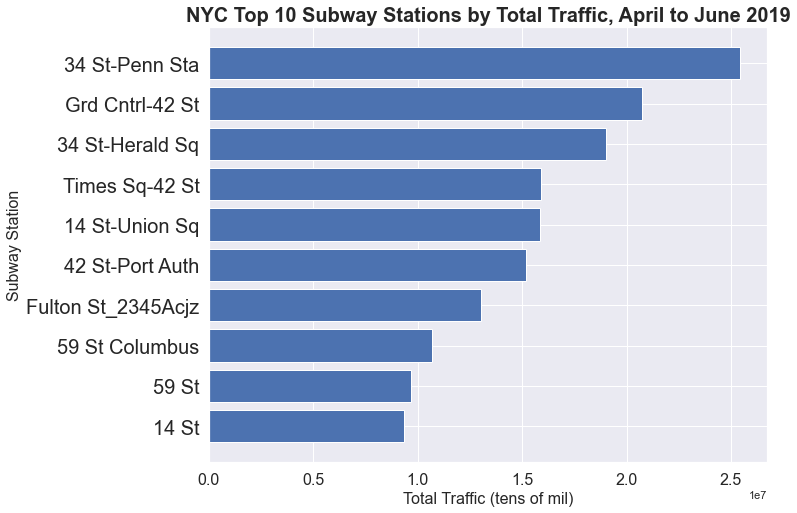

In [151]:
# plt.figure(figsize=[20,14])
plt.barh(df_MTA_2019_top10.Station, df_MTA_2019_top10.DAILY_TRAFFIC)
plt.gca().invert_yaxis()
plt.title('NYC Top 10 Subway Stations by Total Traffic, April to June 2019', weight='bold', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.xlabel('Total Traffic (tens of mil)', fontsize = 16)
plt.ylabel('Subway Station', fontsize = 16)
plt.savefig('top_10_stations.svg');

In [149]:
# change rc parameters with seaborn set method
sns.set(rc={'figure.figsize':(10,8)})

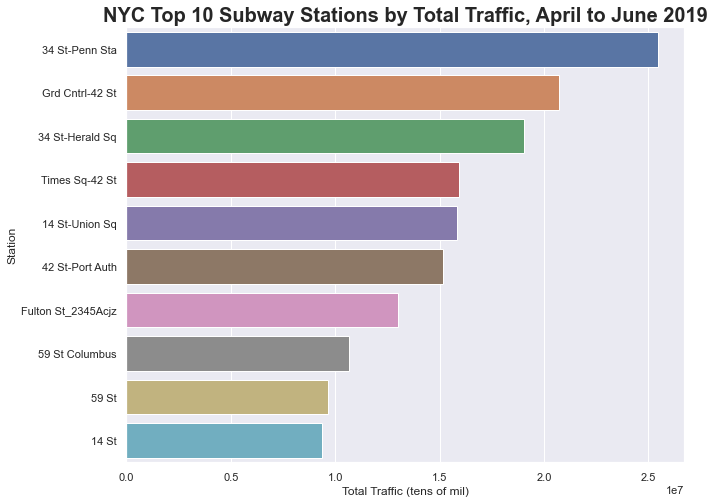

In [153]:
ax = sns.barplot(x = "DAILY_TRAFFIC", y = "Station", data = df_MTA_2019_top10, orient = 'h')
ax.set_title('NYC Top 10 Subway Stations by Total Traffic, April to June 2019', weight='bold', fontsize=20)
ax.set(xlabel = 'Total Traffic (tens of mil)')
fig = ax.get_figure()
fig.savefig('top_10_stations_seaborn.svg');

#### B. US Census Bureau Data (TractID, Income Data)

In [156]:
df1.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [158]:
df1 = df1[['TractId','State','County','Income']]
df1 = df1[df1.State == 'New York']

In [159]:
counties = ['New York County', 'Kings County', 'Bronx County', 'Richmond County', 'Queens County']

In [160]:
df1 = df1[df1.County.isin(counties)]

In [161]:
df1.head()

,TractId,State,County,Income
43283,36005000100,New York,Bronx County,NaN
43284,36005000200,New York,Bronx County,62773.0
43285,36005000400,New York,Bronx County,82697.0
43286,36005001600,New York,Bronx County,33118.0
43287,36005001900,New York,Bronx County,40117.0


In [162]:
df1.reset_index(drop=True,inplace=True)

In [163]:
df1.shape

(2167, 4)

In [164]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TractId  2167 non-null   int64  
 1   State    2167 non-null   object 
 2   County   2167 non-null   object 
 3   Income   2101 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 67.8+ KB


In [165]:
# find the percentile of household income for each census tract ID
df1['Income_percentile'] = df1.Income.rank(pct=True)

In [166]:
# create a score based on income percentile * 10, round to nearest integer, integers from 1 to 10
df1['Score'] = (10*df1['Income_percentile']).apply(np.ceil)

In [167]:
df2 = df1[['TractId','Score']]

#### C. NYC Subway Station Geo Data (Latitude, Longitude)

In [168]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station ID             496 non-null    int64  
 1   Complex ID             496 non-null    int64  
 2   GTFS Stop ID           496 non-null    object 
 3   Division               496 non-null    object 
 4   Line                   496 non-null    object 
 5   Stop Name              496 non-null    object 
 6   Borough                496 non-null    object 
 7   Daytime Routes         496 non-null    object 
 8   Structure              496 non-null    object 
 9   GTFS Latitude          496 non-null    float64
 10  GTFS Longitude         496 non-null    float64
 11  North Direction Label  478 non-null    object 
 12  South Direction Label  481 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 50.5+ KB


In [169]:
nyc_df.head(10)

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
0,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan
5,6,6,R08,BMT,Astoria,39 Av,Q,N W,Elevated,40.752882,-73.932755,Astoria - Ditmars Blvd,Manhattan
6,7,613,R11,BMT,Astoria,Lexington Av/59 St,M,N W R,Subway,40.762660,-73.967258,Queens,Downtown & Brooklyn
7,8,8,R13,BMT,Astoria,5 Av/59 St,M,N W R,Subway,40.764811,-73.973347,Queens,Downtown & Brooklyn
8,9,9,R14,BMT,Broadway - Brighton,57 St - 7 Av,M,N Q R W,Subway,40.764664,-73.980658,Uptown & Queens,Downtown & Brooklyn
9,10,10,R15,BMT,Broadway - Brighton,49 St,M,N R W,Subway,40.759901,-73.984139,Uptown & Queens,Downtown & Brooklyn


In [170]:
from collections import defaultdict

In [171]:
dict2 = defaultdict(int)

In [172]:
for x in list(nyc_df['Stop Name']):
    dict2[x] += 1

In [173]:
df_station_freq = pd.DataFrame(dict2.items())

In [174]:
df_station_freq.columns = ["Station Name","Frequency"]

In [175]:
df_station_freq.sort_values(by="Frequency",ascending=False).head(10)

,Station Name,Frequency
17,Canal St,6
36,86 St,6
95,Fulton St,5
13,23 St,5
135,125 St,4
139,96 St,4
133,145 St,4
10,Times Sq - 42 St,4
138,103 St,3
141,72 St,3


In [176]:
nyc_df.loc[nyc_df['Stop Name'] == 'Canal St']

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
17,18,623,R23,BMT,Broadway,Canal St,M,R W,Subway,40.719527,-74.001775,Uptown & Queens,Downtown & Brooklyn
18,19,623,Q01,BMT,Manhattan Bridge,Canal St,M,N Q,Subway,40.718383,-74.000460,Uptown & Queens,Downtown & Brooklyn
103,104,623,M20,BMT,Jamaica,Canal St,M,J Z,Subway,40.718092,-73.999892,Brooklyn,Broad St
169,169,169,A34,IND,8th Av - Fulton St,Canal St,M,A C E,Subway,40.720824,-74.005229,Uptown - Queens,Downtown & Brooklyn
325,325,325,135,IRT,Broadway - 7Av,Canal St,M,1,Subway,40.722854,-74.006277,Uptown & The Bronx,Downtown
410,410,623,639,IRT,Lexington Av,Canal St,M,6,Subway,40.718803,-74.000193,Uptown & The Bronx,Downtown


In [185]:
list3 = list(nyc_df['Borough'].unique())
list3

['Q', 'M', 'Bk', 'Bx', 'SI']

In [186]:
list4 = ['Queens', 'Manhattan', 'Brooklyn', 'Bronx', 'StatenIsland']

In [187]:
dict1 = dict()

In [188]:
for i in range(len(list3)):
    key = list3[i]
    dict1[key] = list4[i]

In [189]:
dict1

{'Q': 'Queens',
 'M': 'Manhattan',
 'Bk': 'Brooklyn',
 'Bx': 'Bronx',
 'SI': 'StatenIsland'}

In [190]:
nyc_df['Borough2'] = nyc_df.Borough.map(dict1)

In [191]:
nyc_df['Station_Division'] = nyc_df['Stop Name'] + "_" + nyc_df['Division']

In [199]:
nyc_subway = nyc_df.groupby(['Division','Stop Name','Borough','Station_Division','Borough2'])[['GTFS Latitude', 'GTFS Longitude']].mean()
nyc_subway.reset_index(inplace=True)

In [200]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
dtypes: float64(2), object(5)
memory usage: 24.8+ KB


#### *Note: 452 subway stations compared to >2000 census tracts.  Therefore not all census tracts will have a subway station in them.*

In [201]:
# Add a new column census tract ID
nyc_subway['census_tract_id'] = ""

In [202]:
import requests
import urllib

In [203]:
# use latitude and longitude of each subway station as inputs
# use FCC website API below, url with lat/long to get US Census GEOID info (e.g. Census Block, Census Tract ID)
# populate 'census tract ID' column in nyc_subway dataframe
for i in range(len(nyc_subway)):
    lat = nyc_subway.iloc[i,5]
    lon = nyc_subway.iloc[i,6]
    params = urllib.parse.urlencode({'latitude': lat, 'longitude':lon,'format':'json'})
    url = 'https://geo.fcc.gov/api/census/block/find?' + params
    nyc_subway.iloc[i,len(nyc_subway.columns)-1] = requests.get(url).json()['Block']['FIPS'][:11]

In [204]:
nyc_subway.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200


In [205]:
with open('nyc_subway.pickle','wb') as to_write:
    pickle.dump(nyc_subway, to_write)

In [178]:
with open('nyc_subway.pickle','rb') as read_file:
    nyc_subway = pickle.load(read_file)

In [179]:
nyc_subway.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200


In [180]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
 7   census_tract_id   452 non-null    object 
dtypes: float64(2), object(6)
memory usage: 28.4+ KB


In [181]:
# change census tract ID for 42 St - Port Authority Bus Terminal, income percentile seems incorrect (after initial merge with df2 below)
nyc_subway.loc[nyc_subway["Stop Name"] == "42 St - Port Authority Bus Terminal","census_tract_id"] = "36061011500"

In [182]:
nyc_subway[nyc_subway["Stop Name"] == "Canal St"]

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id
61,BMT,Canal St,M,Canal St_BMT,Manhattan,40.718667,-74.000709,36061004500
202,IND,Canal St,M,Canal St_IND,Manhattan,40.720824,-74.005229,36061003300
348,IRT,Canal St,M,Canal St_IRT,Manhattan,40.720828,-74.003235,36061004700


#### D. Merging Data from All Three Data Sources and Creating Visualizations

In [184]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TractId  2167 non-null   int64  
 1   Score    2101 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 34.0 KB


In [185]:
# convert TractId to string so it can used as the key to merge with nyc_subway dataframe
df2['TractId'] = df2['TractId'].astype(str)

In [186]:
nyc_subway_final = nyc_subway.merge(df2, how='inner', left_on='census_tract_id', right_on='TractId')

In [187]:
nyc_subway_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Division          452 non-null    object 
 1   Stop Name         452 non-null    object 
 2   Borough           452 non-null    object 
 3   Station_Division  452 non-null    object 
 4   Borough2          452 non-null    object 
 5   GTFS Latitude     452 non-null    float64
 6   GTFS Longitude    452 non-null    float64
 7   census_tract_id   452 non-null    object 
 8   TractId           452 non-null    object 
 9   Score             433 non-null    float64
dtypes: float64(3), object(7)
memory usage: 38.8+ KB


In [188]:
nyc_subway_final.rename(columns={'Score':'HHIncomePct_score'},inplace=True)

In [189]:
del nyc_subway_final['TractId']

In [190]:
nyc_subway_final.head()

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id,HHIncomePct_score
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400,8.0
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600,8.0
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400,7.0
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400,4.0
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200,10.0


In [191]:
nyc_subway_final[nyc_subway_final["Stop Name"] == "Canal St"]

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id,HHIncomePct_score
80,BMT,Canal St,M,Canal St_BMT,Manhattan,40.718667,-74.000709,36061004500,10.0
241,IND,Canal St,M,Canal St_IND,Manhattan,40.720824,-74.005229,36061003300,10.0
363,IRT,Canal St,M,Canal St_IRT,Manhattan,40.720828,-74.003235,36061004700,10.0


In [192]:
df_MTA_2019_stations = df_MTA_2019_daily.groupby('Station')[['DAILY_TRAFFIC']].sum()

In [193]:
df_MTA_2019_stations.reset_index(inplace=True)

In [194]:
df_MTA_2019_stations.rename(columns={'DAILY_TRAFFIC':'total_traffic'},inplace=True)

In [195]:
df_MTA_2019_stations['traffic_pctile'] = df_MTA_2019_stations.total_traffic.rank(pct=True)

In [196]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile
0,1 Av,3042273.0,0.868996
1,103 St-Corona,2793633.0,0.836245
2,103 St_1,1413910.0,0.624454
3,103 St_6,1971158.0,0.744541
4,103 St_Bc,674654.0,0.320961


In [197]:
df_MTA_2019_stations['traffic_score'] = 10*df_MTA_2019_stations['traffic_pctile']

In [198]:
df_MTA_2019_stations = df_MTA_2019_stations.sort_values(by='total_traffic',ascending=False)

In [199]:
df_MTA_2019_stations.reset_index(drop=True,inplace=True)

In [200]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile,traffic_score
0,34 St-Penn Sta,25447467.0,1.000000,10.000000
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166
2,34 St-Herald Sq,19033731.0,0.995633,9.956332
3,Times Sq-42 St,15918827.0,0.993450,9.934498
4,14 St-Union Sq,15839023.0,0.991266,9.912664


In [201]:
len(df_MTA_2019_stations)

458

In [202]:
list_stations_traffic = list(df_MTA_2019_stations.Station)

In [205]:
list1 = list(df_MTA_2019_top10['Station'])

In [206]:
list1

['34 St-Penn Sta',
 'Grd Cntrl-42 St',
 '34 St-Herald Sq',
 'Times Sq-42 St',
 '14 St-Union Sq',
 '42 St-Port Auth',
 'Fulton St_2345Acjz',
 '59 St Columbus',
 '59 St',
 '14 St']

In [207]:
# group by Stop Name, take the average HH income percent score if there are multiple entries for a single Stop Name
df_subway_income = nyc_subway_final.groupby('Stop Name')[['HHIncomePct_score']].mean()

In [208]:
df_subway_income.reset_index(inplace=True)

In [209]:
df_subway_income.head()

,Stop Name,HHIncomePct_score
0,1 Av,8.0
1,103 St,1.0
2,103 St - Corona Plaza,4.0
3,104 St,6.5
4,110 St,3.0


In [622]:
df_subway_income.loc[df_subway_income["Stop Name"] == "42 St - Port Authority Bus Terminal"]

,Stop Name,HHIncomePct_score
67,42 St - Port Authority Bus Terminal,10.0


In [210]:
list_stations_income = list(df_subway_income['Stop Name'])

In [196]:
list_stations_income

['1 Av',
 '103 St',
 '103 St - Corona Plaza',
 '104 St',
 '110 St',
 '111 St',
 '116 St',
 '116 St - Columbia University',
 '121 St',
 '125 St',
 '135 St',
 '137 St - City College',
 '138 St - Grand Concourse',
 '14 St',
 '14 St - Union Sq',
 '145 St',
 '149 St - Grand Concourse',
 '15 St - Prospect Park',
 '155 St',
 '157 St',
 '161 St - Yankee Stadium',
 '163 St - Amsterdam Av',
 '167 St',
 '168 St',
 '168 St - Washington Hts',
 '169 St',
 '170 St',
 '174 St',
 '174-175 Sts',
 '175 St',
 '176 St',
 '18 Av',
 '18 St',
 '181 St',
 '182-183 Sts',
 '183 St',
 '190 St',
 '191 St',
 '2 Av',
 '20 Av',
 '207 St',
 '21 St',
 '21 St - Queensbridge',
 '215 St',
 '219 St',
 '225 St',
 '23 St',
 '231 St',
 '233 St',
 '238 St',
 '25 Av',
 '25 St',
 '28 St',
 '3 Av',
 '3 Av - 138 St',
 '3 Av - 149 St',
 '30 Av',
 '33 St',
 '34 St - 11 Av',
 '34 St - Herald Sq',
 '34 St - Penn Station',
 '36 Av',
 '36 St',
 '39 Av',
 '4 Av',
 '40 St',
 '42 St - Bryant Pk',
 '42 St - Port Authority Bus Terminal',
 '4

In [211]:
# import fuzzywyzzy, a Python library that uses Levenshtein Distance to calculate the differences between 
# sequences (strings) in a simple-to-use package
# https://github.com/seatgeek/fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [212]:
df_MTA_2019_stations["station_fuzzy"] = ""

In [213]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
0,34 St-Penn Sta,25447467.0,1.000000,10.000000,
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166,
2,34 St-Herald Sq,19033731.0,0.995633,9.956332,
3,Times Sq-42 St,15918827.0,0.993450,9.934498,
4,14 St-Union Sq,15839023.0,0.991266,9.912664,


In [214]:
# for each item in "Station" use process.extract to find the best match in list_stations_income based on 
# fuzz.token_sort_ratio score, populate "station_fuzzy" field with that best match
for i in range(0,len(df_MTA_2019_stations)):
    df_MTA_2019_stations.iloc[i,4] = (process
                                      .extract(df_MTA_2019_stations
                                               .iloc[i,0], 
                                               list_stations_income, 
                                               scorer=fuzz.token_sort_ratio))[0][0]

In [215]:
# compare Station to station_fuzzy, everything looks good so far!
df_MTA_2019_stations[0:10]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
0,34 St-Penn Sta,25447467.0,1.000000,10.000000,34 St - Penn Station
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166,Grand Central - 42 St
2,34 St-Herald Sq,19033731.0,0.995633,9.956332,34 St - Herald Sq
3,Times Sq-42 St,15918827.0,0.993450,9.934498,Times Sq - 42 St
4,14 St-Union Sq,15839023.0,0.991266,9.912664,14 St - Union Sq
5,42 St-Port Auth,15163798.0,0.989083,9.890830,42 St - Bryant Pk
6,Fulton St_2345Acjz,13028059.0,0.986900,9.868996,Fulton St
7,59 St Columbus,10674585.0,0.984716,9.847162,59 St - Columbus Circle
8,59 St,9666542.0,0.982533,9.825328,59 St
9,14 St,9351691.0,0.980349,9.803493,14 St


In [202]:
# compare for next 10 subway stations, row index 18 looks wrong (Path New Wtc vs New Utrecht Av)
df_MTA_2019_stations[10:20]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
10,47-50 Sts Rock,9237205.0,0.978166,9.781659,47-50 Sts - Rockefeller Ctr
11,Path New Wtc,8625204.0,0.975983,9.759825,New Utrecht Av
12,Flushing-Main,7931739.0,0.973799,9.737991,Flushing - Main St
13,Jksn Ht-Roosvlt,7239765.0,0.971616,9.716157,Jackson Hts - Roosevelt Av
14,Canal St_6Jnqrwz,6947195.0,0.969432,9.694323,Canal St
15,Atl Av-Barclay,6919491.0,0.967249,9.672489,Atlantic Av - Barclays Ctr
16,86 St_456,6910964.0,0.965066,9.650655,86 St
17,W 4 St-Wash Sq,6865641.0,0.962882,9.628821,Times Sq - 42 St
18,Lexington Av/53,6451188.0,0.960699,9.606987,Lexington Av/53 St
19,72 St_123,6293509.0,0.958515,9.585153,72 St


In [216]:
# manually change station_fuzzy to WTC Cortlandt (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == '42 St-Port Auth','station_fuzzy'] = '42 St - Port Authority Bus Terminal'

In [217]:
# manually change station_fuzzy to WTC Cortlandt (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == 'Path New Wtc','station_fuzzy'] = 'WTC Cortlandt'

In [638]:
# looks good now!
df_MTA_2019_stations[10:20]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
10,47-50 Sts Rock,9237125.0,0.978166,9.781659,47-50 Sts - Rockefeller Ctr
11,Flushing-Main,7929276.0,0.975983,9.759825,Flushing - Main St
12,Path New Wtc,7545951.0,0.973799,9.737991,WTC Cortlandt
13,Jksn Ht-Roosvlt,7239765.0,0.971616,9.716157,Jackson Hts - Roosevelt Av
14,Canal St_6Jnqrwz,6925707.0,0.969432,9.694323,Canal St
15,86 St_456,6910964.0,0.967249,9.672489,86 St
16,Atl Av-Barclay,6886199.0,0.965066,9.650655,Atlantic Av - Barclays Ctr
17,W 4 St-Wash Sq,6865617.0,0.962882,9.628821,Times Sq - 42 St
18,Lexington Av/53,6451133.0,0.960699,9.606987,Lexington Av/53 St
19,72 St_123,6293500.0,0.958515,9.585153,72 St


In [639]:
# look at next 10 rows, index 24 looks like a mismatch
df_MTA_2019_stations[20:30]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
20,96 St_123,6184069.0,0.956332,9.563319,96 St
21,42 St-Bryant Pk,6147699.0,0.954148,9.541485,42 St - Bryant Pk
22,57 St-7 Av,4989196.0,0.951965,9.519651,57 St - 7 Av
23,Jamaica Center,4874561.0,0.949782,9.497817,Jamaica Center - Parsons/Archer
24,72 St-2 Ave,4549131.0,0.947598,9.475983,57 St - 7 Av
25,Jay St-Metrotec_Acf,4494921.0,0.945415,9.454148,Jay St - MetroTech
26,Borough Hall,4465664.0,0.943231,9.432314,Borough Hall
27,125 St_Abcd,4357090.0,0.941048,9.410480,125 St
28,Bowling Green,4347155.0,0.938865,9.388646,Bowling Green
29,125 St_456,4197425.0,0.936681,9.366812,125 St


In [218]:
# let's see the other results from fuzzywuzzy for the string 'W 4 St-Wash Sq'
process.extract('W 4 St-Wash Sq',list_stations_income, scorer=fuzz.token_sort_ratio)

[('Times Sq - 42 St', 64),
 ('W 4 St', 60),
 ('14 St - Union Sq', 57),
 ('168 St - Washington Hts', 57),
 ('Union Sq - 14 St', 57)]

In [219]:
# manually change station_fuzzy to 'W 4 St' (based on online research, google maps)
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == 'W 4 St-Wash Sq','station_fuzzy'] = 'W 4 St'

In [642]:
# looks good now!
df_MTA_2019_stations[20:30]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
20,96 St_123,6184069.0,0.956332,9.563319,96 St
21,42 St-Bryant Pk,6147699.0,0.954148,9.541485,42 St - Bryant Pk
22,57 St-7 Av,4989196.0,0.951965,9.519651,57 St - 7 Av
23,Jamaica Center,4874561.0,0.949782,9.497817,Jamaica Center - Parsons/Archer
24,72 St-2 Ave,4549131.0,0.947598,9.475983,57 St - 7 Av
25,Jay St-Metrotec_Acf,4494921.0,0.945415,9.454148,Jay St - MetroTech
26,Borough Hall,4465664.0,0.943231,9.432314,Borough Hall
27,125 St_Abcd,4357090.0,0.941048,9.410480,125 St
28,Bowling Green,4347155.0,0.938865,9.388646,Bowling Green
29,125 St_456,4197425.0,0.936681,9.366812,125 St


In [643]:
df_MTA_2019_stations[40:50]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
40,Crown Hts-Utica,3668929.0,0.912664,9.126638,Crown Hts - Utica Av
41,Bedford Av,3597374.0,0.910480,9.104803,Bedford Av
42,23 St_Fm,3584663.0,0.908297,9.082969,23 St
43,145 St_Abcd,3577308.0,0.906114,9.061135,145 St
44,86 St-2 Ave,3566979.0,0.903930,9.039301,5 Av/53 St
45,Wall St_23,3558693.0,0.901747,9.017467,Wall St
46,Grand St_Bd,3513974.0,0.899563,8.995633,Grand St
47,Chambers St_23Ace,3485843.0,0.897380,8.973799,Chambers St
48,Sutphin-Archer,3481969.0,0.895197,8.951965,Sutphin Blvd
49,Lexington Av/63,3479988.0,0.893013,8.930131,Lexington Av/63 St


In [220]:
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == '72 St-2 Ave','station_fuzzy'] = '72 St'

In [221]:
df_MTA_2019_stations.loc[df_MTA_2019_stations.Station == "B'Way-Lafayette",'station_fuzzy'] = "Broadway-Lafayette St"

In [648]:
df_MTA_2019_stations[30:40]

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy
30,B'Way-Lafayette,4167133.0,0.934498,9.344978,Broadway-Lafayette St
31,Journal Square,4105982.0,0.932314,9.323144,Court Sq
32,5 Av/53 St,4086190.0,0.930131,9.301310,5 Av/53 St
33,50 St_1,4063076.0,0.927948,9.279476,50 St
34,77 St_6,3986805.0,0.925764,9.257642,77 St
35,33 St,3963276.0,0.923581,9.235808,33 St
36,Kew Gardens,3956695.0,0.921397,9.213974,Kew Gardens - Union Tpke
37,Delancey/Essex,3918805.0,0.919214,9.192140,Delancey St
38,23 St_6,3831223.0,0.917031,9.170306,23 St
39,161/Yankee Stad,3682346.0,0.914847,9.148472,161 St - Yankee Stadium


In [224]:
# join df_MTA_2019_stations with df_subway_income 
df_final = df_MTA_2019_stations.merge(df_subway_income, how='left', left_on='station_fuzzy', right_on='Stop Name')

In [209]:
df_final.head(10)

,Station,total_traffic,traffic_pctile,traffic_score,station_fuzzy,Stop Name,HHIncomePct_score
0,34 St-Penn Sta,25505839.0,1.000000,10.000000,34 St - Penn Station,34 St - Penn Station,10.0
1,Grd Cntrl-42 St,20771999.0,0.997817,9.978166,Grand Central - 42 St,Grand Central - 42 St,10.0
2,34 St-Herald Sq,19034901.0,0.995633,9.956332,34 St - Herald Sq,34 St - Herald Sq,10.0
3,Times Sq-42 St,16010420.0,0.993450,9.934498,Times Sq - 42 St,Times Sq - 42 St,10.0
4,14 St-Union Sq,15839026.0,0.991266,9.912664,14 St - Union Sq,14 St - Union Sq,10.0
5,42 St-Port Auth,15166233.0,0.989083,9.890830,42 St - Port Authority Bus Terminal,42 St - Port Authority Bus Terminal,10.0
6,Fulton St_2345Acjz,13027251.0,0.986900,9.868996,Fulton St,Fulton St,9.5
7,59 St Columbus,10680517.0,0.984716,9.847162,59 St - Columbus Circle,59 St - Columbus Circle,10.0
8,59 St,9666581.0,0.982533,9.825328,59 St,59 St,6.0
9,14 St,9351710.0,0.980349,9.803493,14 St,14 St,10.0


In [651]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 457
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station            458 non-null    object 
 1   total_traffic      458 non-null    float64
 2   traffic_pctile     458 non-null    float64
 3   traffic_score      458 non-null    float64
 4   station_fuzzy      458 non-null    object 
 5   Stop Name          458 non-null    object 
 6   HHIncomePct_score  447 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.6+ KB


In [225]:
df_final.drop(columns=['station_fuzzy','Stop Name'], inplace = True)

In [226]:
# weight traffic by 70%, hh income by 30%
weight1 = 0.7
weight2 = 1-weight1
df_final['weighted_score'] = weight1*df_final['traffic_score'] + weight2*df_final['HHIncomePct_score']

In [227]:
df_final = df_final.sort_values(by='weighted_score',ascending=False).head(5)

In [228]:
df_final.reset_index(drop=True,inplace=True)

In [229]:
df_final

,Station,total_traffic,traffic_pctile,traffic_score,HHIncomePct_score,weighted_score
0,34 St-Penn Sta,25447467.0,1.000000,10.000000,10.0,10.000000
1,Grd Cntrl-42 St,20717561.0,0.997817,9.978166,10.0,9.984716
2,34 St-Herald Sq,19033731.0,0.995633,9.956332,10.0,9.969432
3,Times Sq-42 St,15918827.0,0.993450,9.934498,10.0,9.954148
4,14 St-Union Sq,15839023.0,0.991266,9.912664,10.0,9.938865


In [230]:
list5 = list(df_final.Station)

In [231]:
df_MTA_2019_daily['STATION'] = df_MTA_2019_daily['STATION'].apply(proper)

### Filter the top 5 stations and look at the best day of week, time of day with most traffic

In [232]:
df_MTA_2019_top5 = df_MTA_2019_daily.loc[df_MTA_2019_daily.STATION.isin(list5)]

In [233]:
df_MTA_2019_top5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27696 entries, 5326 to 340865
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   C/A               27696 non-null  object        
 1   UNIT              27696 non-null  object        
 2   SCP               27696 non-null  object        
 3   STATION           27696 non-null  object        
 4   DATE              27696 non-null  object        
 5   ENTRIES           27696 non-null  int64         
 6   EXITS             27696 non-null  int64         
 7   PREV_DATE         27385 non-null  object        
 8   PREV_ENTRIES      27385 non-null  float64       
 9   PREV_EXITS        27385 non-null  float64       
 10  DAILY_ENTRIES     27377 non-null  float64       
 11  unique_turnstile  27696 non-null  object        
 12  DAILY_EXITS       27376 non-null  float64       
 13  Station           27696 non-null  object        
 14  DAILY_TRAFFIC     

In [234]:
df_MTA_2019_top5["DAY"] = df_MTA_2019_top5["DATE_TIME"].dt.day_name()

In [664]:
df_MTA_2019_top5.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME,year,month,period,DAY
5263,A021,R032,01-00-00,Times Sq-42 St,03/31/2019,8694916,10644571,03/30/2019,8693348.0,10641864.0,1568.0,A021_R032_01-00-00_TIMES SQ-42 ST,2707.0,Times Sq-42 St,4275.0,2019-03-31,2019,3,2019_03,Sunday
5264,A021,R032,01-00-00,Times Sq-42 St,04/01/2019,8696076,10646288,03/31/2019,8694916.0,10644571.0,1160.0,A021_R032_01-00-00_TIMES SQ-42 ST,1717.0,Times Sq-42 St,2877.0,2019-04-01,2019,4,2019_04,Monday
5265,A021,R032,01-00-00,Times Sq-42 St,04/02/2019,8699726,10651113,04/01/2019,8696076.0,10646288.0,3650.0,A021_R032_01-00-00_TIMES SQ-42 ST,4825.0,Times Sq-42 St,8475.0,2019-04-02,2019,4,2019_04,Tuesday
5266,A021,R032,01-00-00,Times Sq-42 St,04/03/2019,8703567,10656188,04/02/2019,8699726.0,10651113.0,3841.0,A021_R032_01-00-00_TIMES SQ-42 ST,5075.0,Times Sq-42 St,8916.0,2019-04-03,2019,4,2019_04,Wednesday
5267,A021,R032,01-00-00,Times Sq-42 St,04/04/2019,8707382,10661399,04/03/2019,8703567.0,10656188.0,3815.0,A021_R032_01-00-00_TIMES SQ-42 ST,5211.0,Times Sq-42 St,9026.0,2019-04-04,2019,4,2019_04,Thursday


In [237]:
df_MTA_2019_top5.DAY.value_counts()

Sunday       3983
Saturday     3972
Friday       3961
Monday       3950
Thursday     3946
Tuesday      3944
Wednesday    3940
Name: DAY, dtype: int64

In [238]:
df_MTA_2019_top5_weekday = df_MTA_2019_top5.groupby('DAY')['DAILY_TRAFFIC'].sum()

In [239]:
df_MTA_2019_top5_weekday.sort_values(ascending=False,inplace=True)

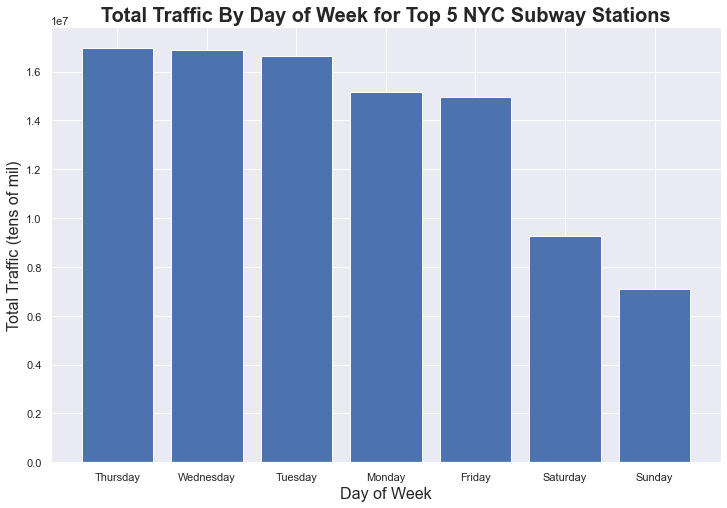

In [243]:
plt.figure(figsize=[12,8])
plt.bar(df_MTA_2019_top5_weekday.index, df_MTA_2019_top5_weekday)
plt.title('Total Traffic By Day of Week for Top 5 NYC Subway Stations',weight='bold',fontsize=20)
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('Total Traffic (tens of mil)', fontsize=16)
plt.savefig('traffic_dayofweek_top5NYC.svg');

In [244]:
df_MTA_2019['STATION'] = df_MTA_2019['STATION'].apply(proper)

In [247]:
df_MTA_2019_top5_day_hour = df_MTA_2019[df_MTA_2019["STATION"].isin(list5)]

In [248]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,station_linename
2684,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,00:00:00,REGULAR,8693348,10641864,2019-03-30 00:00:00,TIMES SQ-42 ST_1237ACENQRSW
2685,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,04:00:00,REGULAR,8693471,10641914,2019-03-30 04:00:00,TIMES SQ-42 ST_1237ACENQRSW
2686,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,08:00:00,REGULAR,8693564,10642039,2019-03-30 08:00:00,TIMES SQ-42 ST_1237ACENQRSW
2687,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,12:00:00,REGULAR,8693787,10642708,2019-03-30 12:00:00,TIMES SQ-42 ST_1237ACENQRSW
2688,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,03/30/2019,16:00:00,REGULAR,8694183,10643461,2019-03-30 16:00:00,TIMES SQ-42 ST_1237ACENQRSW


In [249]:
df_MTA_2019_top5_day_hour["DAY"] = df_MTA_2019_top5_day_hour["DATE_TIME"].dt.day_name()

In [250]:
# create a new column "HOUR" to extract the hour from datetime timestamps
df_MTA_2019_top5_day_hour["HOUR"] = df_MTA_2019_top5_day_hour.DATE_TIME.dt.hour

In [251]:
# filter DAY to include only Thursday, Wednesday, Tuesday (top 3 weekdays with most traffic)
df_MTA_2019_top5_day_hour = (df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour
                                                       .DAY
                                                       .isin(["Thursday","Wednesday","Tuesday"])])

In [252]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"] = (df_MTA_2019_top5_day_hour
                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                    .DATE_TIME
                                                    .apply(lambda group: group.shift(1)))

In [253]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,station_linename,DAY,HOUR,PREV_TIMESTAMP
2702,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,00:00:00,REGULAR,8699726,10651113,2019-04-02 00:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,0,NaT
2703,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,04:00:00,REGULAR,8699810,10651145,2019-04-02 04:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,4,2019-04-02 00:00:00
2704,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,08:00:00,REGULAR,8700151,10651587,2019-04-02 08:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,8,2019-04-02 04:00:00
2705,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,12:00:00,REGULAR,8700661,10653876,2019-04-02 12:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,12,2019-04-02 08:00:00
2706,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,16:00:00,REGULAR,8701308,10654845,2019-04-02 16:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,16,2019-04-02 12:00:00


In [254]:
df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_ENTRIES"] = (df_MTA_2019_top5_day_hour
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                                       .ENTRIES
                                                       .apply(lambda group: group.shift(1)))

In [255]:
df_MTA_2019_top5_day_hour.reset_index(drop=True,inplace=True)

In [256]:
df_MTA_2019_top5_day_hour.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,station_linename,DAY,HOUR,PREV_TIMESTAMP,PREV_TIMESTAMP_ENTRIES
0,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,00:00:00,REGULAR,8699726,10651113,2019-04-02 00:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,0,NaT,NaN
1,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,04:00:00,REGULAR,8699810,10651145,2019-04-02 04:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,4,2019-04-02 00:00:00,8699726.0
2,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,08:00:00,REGULAR,8700151,10651587,2019-04-02 08:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,8,2019-04-02 04:00:00,8699810.0
3,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,12:00:00,REGULAR,8700661,10653876,2019-04-02 12:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,12,2019-04-02 08:00:00,8700151.0
4,A021,R032,01-00-00,Times Sq-42 St,1237ACENQRSW,BMT,04/02/2019,16:00:00,REGULAR,8701308,10654845,2019-04-02 16:00:00,TIMES SQ-42 ST_1237ACENQRSW,Tuesday,16,2019-04-02 12:00:00,8700661.0


In [259]:
df_MTA_2019_top5_day_hour["TIMESTAMP_DIFF"] = (df_MTA_2019_top5_day_hour["DATE_TIME"] - 
                                               df_MTA_2019_top5_day_hour["PREV_TIMESTAMP"])

In [260]:
df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF.value_counts()

0 days 04:00:00    66666
4 days 04:00:00     3678
0 days 00:01:20      290
0 days 00:01:21      238
0 days 08:00:00      111
                   ...  
0 days 00:00:46        1
0 days 02:46:07        1
0 days 00:01:26        1
0 days 00:00:45        1
0 days 02:45:55        1
Name: TIMESTAMP_DIFF, Length: 348, dtype: int64

In [262]:
len(df_MTA_2019_top5_day_hour)

74307

In [263]:
# 90% of rows have timestamp differences of 4 hours (which is what is expected based on NYC MTA website)
66666 / 74307

0.8971698494085348

In [264]:
diff1 = df_MTA_2019_top5_day_hour.TIMESTAMP_DIFF.value_counts().index[0]

In [265]:
diff1

Timedelta('0 days 04:00:00')

In [266]:
# filter to only include the rows where the timestamp diff is 4 hours
df_MTA_2019_top5_day_hour = df_MTA_2019_top5_day_hour[df_MTA_2019_top5_day_hour["TIMESTAMP_DIFF"] == diff1]

In [267]:
df_MTA_2019_top5_day_hour["ENTRIES_TIME_PERIOD"] = df_MTA_2019_top5_day_hour["ENTRIES"] - df_MTA_2019_top5_day_hour["PREV_TIMESTAMP_ENTRIES"]

In [268]:
sorted(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)[0:10]

[-5214038.0,
 -3603365.0,
 -2225883.0,
 -1558851.0,
 -789188.0,
 -60722.0,
 -9466.0,
 -1814.0,
 -1809.0,
 -1798.0]

In [269]:
sorted(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)[-10:]

[3570.0,
 3570.0,
 3604.0,
 3761.0,
 3780.0,
 3854.0,
 3861.0,
 3946.0,
 3963.0,
 458749.0]

In [270]:
# assumption 1 person per second, 60 seconds per min, 60 min per hour, 4 hour period
60*60*4

14400

In [271]:
df_MTA_2019_top5_day_hour.reset_index(drop = True, inplace = True)

In [272]:
df_large_entries = df_MTA_2019_top5_day_hour.loc[abs(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD) > 5000]

In [273]:
# filter out rows with large negative/positive values for ENTRIES_TIME_PERIOD
df_MTA_2019_top5_day_hour = (df_MTA_2019_top5_day_hour
                             .loc[abs(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD) < 5000])

In [274]:
df_MTA_2019_top5_day_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66658 entries, 0 to 66665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   C/A                     66658 non-null  object         
 1   UNIT                    66658 non-null  object         
 2   SCP                     66658 non-null  object         
 3   STATION                 66658 non-null  object         
 4   LINENAME                66658 non-null  object         
 5   DIVISION                66658 non-null  object         
 6   DATE                    66658 non-null  object         
 7   TIME                    66658 non-null  object         
 8   DESC                    66658 non-null  object         
 9   ENTRIES                 66658 non-null  int64          
 10  EXITS                   66658 non-null  int64          
 11  DATE_TIME               66658 non-null  datetime64[ns] 
 12  station_linename        66658 no

In [275]:
min(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

-1814.0

In [276]:
max(df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD)

3963.0

In [277]:
def reverse_num(x):
    return -x if x<0 else x

In [278]:
df_MTA_2019_top5_day_hour["ENTRIES_TIME_PERIOD"] = df_MTA_2019_top5_day_hour.ENTRIES_TIME_PERIOD.apply(reverse_num)

In [281]:
df_MTA_2019_top5_day_hour["DAY_HR"] = df_MTA_2019_top5_day_hour["DAY"] + "_" + df_MTA_2019_top5_day_hour["HOUR"].astype(str)

In [282]:
df_MTA_2019_top5_day_hour.DAY_HR.value_counts()

Wednesday_4     2766
Thursday_0      2760
Thursday_16     2759
Tuesday_4       2758
Thursday_8      2757
Thursday_4      2752
Wednesday_0     2751
Tuesday_8       2750
Wednesday_16    2737
Thursday_20     2726
Tuesday_20      2719
Tuesday_16      2716
Wednesday_20    2713
Wednesday_8     2692
Tuesday_12      2611
Thursday_12     2605
Wednesday_12    2572
Thursday_21      940
Wednesday_21     938
Thursday_5       937
Thursday_1       937
Tuesday_5        936
Tuesday_21       933
Wednesday_1      931
Wednesday_5      930
Wednesday_17     925
Thursday_17      925
Wednesday_13     917
Tuesday_17       917
Tuesday_9        904
Wednesday_9      887
Thursday_13      878
Thursday_9       869
Tuesday_13       857
Wednesday_6      299
Wednesday_22     299
Wednesday_18     299
Tuesday_18       299
Tuesday_6        299
Wednesday_14     299
Thursday_2       299
Tuesday_22       299
Thursday_18      299
Thursday_22      299
Wednesday_2      299
Tuesday_14       299
Thursday_14      298
Thursday_6   

In [283]:
df_MTA_2019_top5_day_hour_total = df_MTA_2019_top5_day_hour.groupby("DAY_HR").ENTRIES_TIME_PERIOD.sum()

In [284]:
df_MTA_2019_top5_day_hour_total = pd.DataFrame(df_MTA_2019_top5_day_hour_total)

In [285]:
df_MTA_2019_top5_day_hour_total = (df_MTA_2019_top5_day_hour_total
                                   .sort_values(by = "ENTRIES_TIME_PERIOD", ascending = False)
                                   .reset_index()
                                   .head(10))

In [286]:
df_MTA_2019_top5_day_hour_total

,DAY_HR,ENTRIES_TIME_PERIOD
0,Wednesday_20,2124932.0
1,Tuesday_20,2109155.0
2,Thursday_20,2094063.0
3,Thursday_12,1194726.0
4,Tuesday_12,1179929.0
5,Wednesday_12,1166059.0
6,Tuesday_21,1026580.0
7,Wednesday_21,1025168.0
8,Thursday_21,1011490.0
9,Thursday_16,988215.0


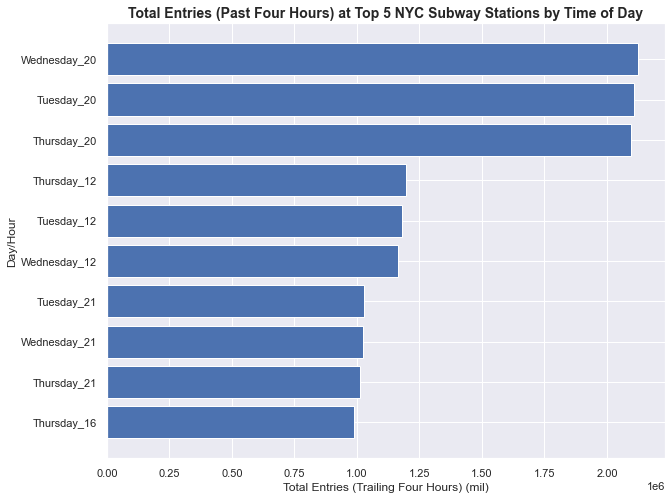

In [287]:
plt.figure(figsize=[10,8])
plt.barh(df_MTA_2019_top5_day_hour_total.DAY_HR, df_MTA_2019_top5_day_hour_total.ENTRIES_TIME_PERIOD)
plt.gca().invert_yaxis()
plt.title("Total Entries (Past Four Hours) at Top 5 NYC Subway Stations by Time of Day", weight='bold', fontsize = 14)
plt.xlabel("Total Entries (Trailing Four Hours) (mil)", fontsize=12)
plt.ylabel("Day/Hour", fontsize=12);

In [292]:
df_MTA_2019_top5_pivot = df_MTA_2019_top5_day_hour.pivot_table(values = "ENTRIES_TIME_PERIOD", index = "HOUR", columns = "DAY", aggfunc = 'sum')

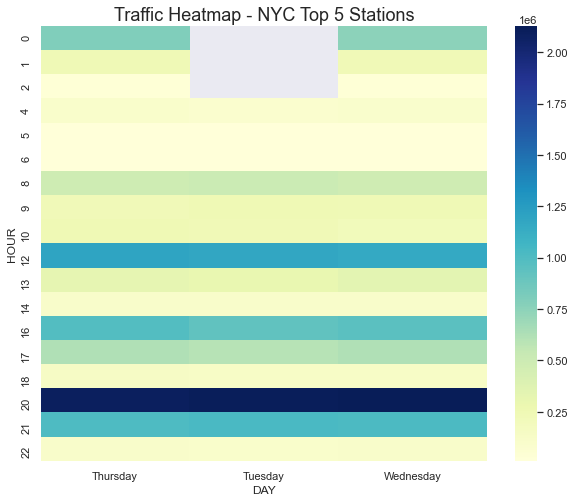

In [301]:
ax = sns.heatmap(df_MTA_2019_top5_pivot, cmap='YlGnBu')
plt.title("Traffic Heatmap - NYC Top 5 Stations", fontsize = 18)
plt.savefig('nyc_top5stations_dayhour_trafficheatmap.svg');